In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("qsar_fish_toxicity.csv")

display(df.head())
display(df.info())

,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,LC50 [-LOG(mol/L)]
0,3.260,0.829,1.676,0.0,1,1.453,3.770
1,2.189,0.580,0.863,0.0,0,1.348,3.115
2,2.125,0.638,0.831,0.0,0,1.348,3.531
3,3.027,0.331,1.472,1.0,0,1.807,3.510
4,2.094,0.827,0.860,0.0,0,1.886,5.390


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CIC0                906 non-null    float64
 1   SM1_Dz(Z)           906 non-null    float64
 2   GATS1i              906 non-null    float64
 3   NdsCH               907 non-null    float64
 4   NdssC               908 non-null    int64  
 5   MLOGP               905 non-null    float64
 6   LC50 [-LOG(mol/L)]  906 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 49.8 KB


None

In [2]:
# counting missing values

df.isnull().sum()

CIC0                  2
SM1_Dz(Z)             2
GATS1i                2
NdsCH                 1
NdssC                 0
MLOGP                 3
LC50 [-LOG(mol/L)]    2
dtype: int64

# Imputation of missing values
# Mean/Median/Mode


In [3]:
# Impute missing values with appropriate methods
for column in df.columns:
    if df[column].dtype == 'object':
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:
        df[column].fillna(df[column].mean(), inplace=True)

# Verify that there are no missing values
df.isnull().sum()


CIC0                  0
SM1_Dz(Z)             0
GATS1i                0
NdsCH                 0
NdssC                 0
MLOGP                 0
LC50 [-LOG(mol/L)]    0
dtype: int64

# KNN Algorithm


In [4]:
from sklearn.impute import KNNImputer

# Impute missing values using KNN
imputer = KNNImputer(n_neighbors=5)
data_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Check for missing values after imputation
print("\nMissing values after imputation:")
print(data_imputed.isnull().sum())

# Display the first few rows of the imputed dataset
print("\nData after KNN Imputation:")
print(data_imputed.head())



Missing values after imputation:
CIC0                  0
SM1_Dz(Z)             0
GATS1i                0
NdsCH                 0
NdssC                 0
MLOGP                 0
LC50 [-LOG(mol/L)]    0
dtype: int64

Data after KNN Imputation:
    CIC0  SM1_Dz(Z)  GATS1i  NdsCH  NdssC  MLOGP  LC50 [-LOG(mol/L)]
0  3.260      0.829   1.676    0.0    1.0  1.453               3.770
1  2.189      0.580   0.863    0.0    0.0  1.348               3.115
2  2.125      0.638   0.831    0.0    0.0  1.348               3.531
3  3.027      0.331   1.472    1.0    0.0  1.807               3.510
4  2.094      0.827   0.860    0.0    0.0  1.886               5.390


# Linear Regression Imputation

In [5]:
from sklearn.linear_model import LinearRegression

# Function to perform regression imputation
def regression_imputation(df, target):
    # Separate data into features and target
    features = df.drop(columns=[target])
    target_data = df[target]
    
    # Create mask for missing values in target
    missing_mask = target_data.isnull()
    
    # Split data into training and prediction sets
    X_train = features[~missing_mask]
    y_train = target_data[~missing_mask]
    X_pred = features[missing_mask]
    
    # Train the regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Predict missing values
    predicted_values = model.predict(X_pred)
    
    # Fill in the missing values
    df.loc[missing_mask, target] = predicted_values
    return data

# Perform regression imputation for each column with missing values
for column in df.columns:
    if df[column].isnull().sum() > 0:
        data = regression_imputation(df, column)

# Check for missing values after imputation
print("\nMissing values after imputation:")
print(df.isnull().sum())

# Display the first few rows of the imputed dataset
print("\nData after Regression Imputation:")
print(df.head())


Missing values after imputation:
CIC0                  0
SM1_Dz(Z)             0
GATS1i                0
NdsCH                 0
NdssC                 0
MLOGP                 0
LC50 [-LOG(mol/L)]    0
dtype: int64

Data after Regression Imputation:
    CIC0  SM1_Dz(Z)  GATS1i  NdsCH  NdssC  MLOGP  LC50 [-LOG(mol/L)]
0  3.260      0.829   1.676    0.0      1  1.453               3.770
1  2.189      0.580   0.863    0.0      0  1.348               3.115
2  2.125      0.638   0.831    0.0      0  1.348               3.531
3  3.027      0.331   1.472    1.0      0  1.807               3.510
4  2.094      0.827   0.860    0.0      0  1.886               5.390


# Linear Interpolation

In [6]:
# Perform linear interpolation
data_interpolated = df.interpolate(method='linear', limit_direction='forward', axis=0)

# Check for missing values after imputation
print("\nMissing values after imputation:")
print(data_interpolated.isnull().sum())

# Display the first few rows of the imputed dataset
print("\nData after Linear Interpolation:")
print(data_interpolated.head())


Missing values after imputation:
CIC0                  0
SM1_Dz(Z)             0
GATS1i                0
NdsCH                 0
NdssC                 0
MLOGP                 0
LC50 [-LOG(mol/L)]    0
dtype: int64

Data after Linear Interpolation:
    CIC0  SM1_Dz(Z)  GATS1i  NdsCH  NdssC  MLOGP  LC50 [-LOG(mol/L)]
0  3.260      0.829   1.676    0.0      1  1.453               3.770
1  2.189      0.580   0.863    0.0      0  1.348               3.115
2  2.125      0.638   0.831    0.0      0  1.348               3.531
3  3.027      0.331   1.472    1.0      0  1.807               3.510
4  2.094      0.827   0.860    0.0      0  1.886               5.390


# Stochastic Imputation

In [7]:
# Function to perform stochastic imputation

def stochastic_imputation(df, target):
    
    # Separate data into features and target
    features = df.drop(columns=[target])
    target_data = df[target]
    
    # Create mask for missing values in target
    missing_mask = target_data.isnull()
    
    # Split data into training and prediction sets
    X_train = features[~missing_mask]
    y_train = target_data[~missing_mask]
    X_pred = features[missing_mask]
    
    # Train the regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Predict missing values
    predicted_values = model.predict(X_pred)
    
    # Calculate the standard deviation of the residuals
    residuals = y_train - model.predict(X_train)
    std_dev = np.std(residuals)
    
    # Add normally distributed noise to the predicted values
    noise = np.random.normal(0, std_dev, size=predicted_values.shape)
    stochastic_predictions = predicted_values + noise
    
    # Fill in the missing values
    df.loc[missing_mask, target] = stochastic_predictions
    return df

# Perform stochastic imputation for each column with missing values
for column in df.columns:
    if df[column].isnull().sum() > 0:
        df = stochastic_imputation(df, column)

# Check for missing values after imputation
print("\nMissing values after imputation:")
print(df.isnull().sum())

# Display the first few rows of the imputed dataset
print("\nData after Stochastic Imputation:")
print(df.head())


Missing values after imputation:
CIC0                  0
SM1_Dz(Z)             0
GATS1i                0
NdsCH                 0
NdssC                 0
MLOGP                 0
LC50 [-LOG(mol/L)]    0
dtype: int64

Data after Stochastic Imputation:
    CIC0  SM1_Dz(Z)  GATS1i  NdsCH  NdssC  MLOGP  LC50 [-LOG(mol/L)]
0  3.260      0.829   1.676    0.0      1  1.453               3.770
1  2.189      0.580   0.863    0.0      0  1.348               3.115
2  2.125      0.638   0.831    0.0      0  1.348               3.531
3  3.027      0.331   1.472    1.0      0  1.807               3.510
4  2.094      0.827   0.860    0.0      0  1.886               5.390


#  Boxplot to detect outliers

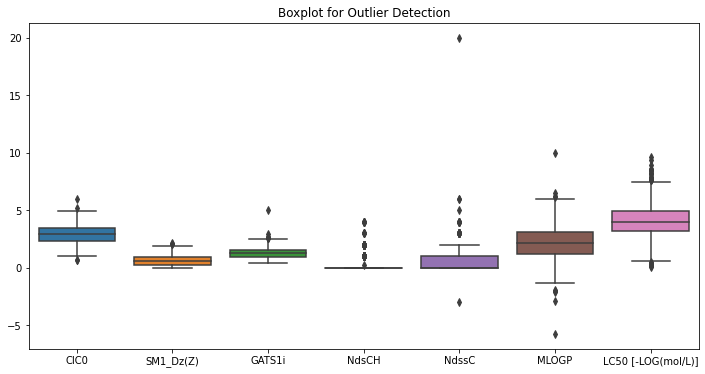

In [8]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title('Boxplot for Outlier Detection')
plt.show()


INSIGHTS:

Here we can clearly see that ouliers are  present in each of the variable set. So we need to perform the ouliers removal

We can also use scatterplot, histogram to visualise the outliers

# OUTLIERS DETECTION

Z- SCORE METHOD

In [9]:
# Function to detect outliers using Z-Score
def detect_outliers_z_score(df, threshold=3):
    mean = np.mean(df)
    std = np.std(df)
    z_scores = [(x - mean) / std for x in df]
    outliers = [x for x, z in zip(df, z_scores) if np.abs(z) > threshold]
    return outliers

# Applying Z-Score method to each numerical column
z_score_outliers = {}
for column in df.select_dtypes(include=[np.number]).columns:
    outliers = detect_outliers_z_score(df[column].dropna())
    z_score_outliers[column] = outliers

z_score_outliers


{'CIC0': [5.926],
 'SM1_Dz(Z)': [2.044, 2.171, 2.071],
 'GATS1i': [2.698, 2.606, 4.98, 2.609, 2.672, 2.92, 2.539, 2.591],
 'NdsCH': [3.0, 4.0, 3.0, 4.0, 3.0, 4.0, 4.0, 3.0, 3.0, 4.0, 4.0, 4.0],
 'NdssC': [4, 4, 4, 4, 4, 20, 4, 4, -3, 5, 4, 6, 6],
 'MLOGP': [10.0, -5.78, -2.884],
 'LC50 [-LOG(mol/L)]': [8.471, 9.612, 8.571, 8.604, 9.354, 8.916, 8.433]}

IQR METHOD

In [10]:
# Function to detect outliers using IQR
def detect_outliers_iqr(df):
    Q1 = np.percentile(df, 25)
    Q3 = np.percentile(df, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = [x for x in df if x < lower_bound or x > upper_bound]
    return outliers

# Applying IQR method to each numerical column
iqr_outliers = {}
for column in df.select_dtypes(include=[np.number]).columns:
    outliers = detect_outliers_iqr(df[column].dropna())
    iqr_outliers[column] = outliers

iqr_outliers


{'CIC0': [0.667, 5.926, 0.667, 5.158],
 'SM1_Dz(Z)': [2.044, 2.171, 2.071],
 'GATS1i': [2.698, 2.606, 4.98, 2.609, 2.672, 2.92, 2.539, 2.591],
 'NdsCH': [1.0,
  1.0,
  1.0,
  1.0,
  3.0,
  1.0,
  1.0,
  1.0,
  2.0,
  2.0,
  2.0,
  4.0,
  1.0,
  2.0,
  1.0,
  1.0,
  1.0,
  1.0,
  2.0,
  1.0,
  1.0,
  1.0,
  1.0,
  2.0,
  1.0,
  1.0,
  2.0,
  1.0,
  2.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  2.0,
  2.0,
  1.0,
  1.0,
  1.0,
  3.0,
  1.0,
  1.0,
  2.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  4.0,
  0.22932745314222713,
  1.0,
  1.0,
  1.0,
  1.0,
  2.0,
  1.0,
  1.0,
  1.0,
  1.0,
  2.0,
  3.0,
  2.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  2.0,
  1.0,
  2.0,
  1.0,
  1.0,
  2.0,
  1.0,
  1.0,
  4.0,
  1.0,
  1.0,
  2.0,
  1.0,
  1.0,
  4.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  3.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  3.0,
  1.0,
  2.0,
  1.0,
  1.0,
  2.0,
  4.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,

In [11]:
df_noMV = imputer.fit_transform(df)

df_noMV = pd.DataFrame(df_noMV, columns = df.columns)

# Step 1: Identify numerical columns excluding 'NdsCH'
numerical_cols = df_noMV.select_dtypes(include=np.number).columns
numerical_cols = numerical_cols[numerical_cols != 'NdsCH']  # Exclude 'NdsCH'

# Step 2: Define a function to find outliers using IQR method
def find_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

# Step 3: Remove outliers from all numerical columns except 'NdsCH'
for column in numerical_cols:
    lower_bound, upper_bound = find_outliers_iqr(df_noMV, column)
    df_noMV = df_noMV[(df_noMV[column] >= lower_bound) & (df_noMV[column] <= upper_bound)]

# Display the new dataframe without outliers
print("DataFrame after removing outliers:")
print(df_noMV.head())

# Step 4: Verify the total number of rows after outlier removal
print(f"Total number of rows after outlier removal: {len(df_noMV)}")

DataFrame after removing outliers:
    CIC0  SM1_Dz(Z)  GATS1i  NdsCH  NdssC  MLOGP  LC50 [-LOG(mol/L)]
0  3.260      0.829   1.676    0.0    1.0  1.453               3.770
1  2.189      0.580   0.863    0.0    0.0  1.348               3.115
2  2.125      0.638   0.831    0.0    0.0  1.348               3.531
3  3.027      0.331   1.472    1.0    0.0  1.807               3.510
4  2.094      0.827   0.860    0.0    0.0  1.886               5.390
Total number of rows after outlier removal: 833


# DESCRIPTIVE STATISTICS

In [12]:
# Display descriptive statistics
print("Descriptive Statistics:")
print(df_noMV.describe())

Descriptive Statistics:
             CIC0   SM1_Dz(Z)      GATS1i       NdsCH       NdssC       MLOGP  \
count  833.000000  833.000000  833.000000  833.000000  833.000000  833.000000   
mean     2.868766    0.604885    1.276216    0.216362    0.379352    2.120826   
std      0.727881    0.414123    0.374748    0.581214    0.641255    1.317599   
min      0.965000    0.000000    0.396000    0.000000    0.000000   -1.306000   
25%      2.309000    0.223000    0.945000    0.000000    0.000000    1.246000   
50%      2.893000    0.560000    1.227000    0.000000    0.000000    2.127000   
75%      3.380000    0.880000    1.556000    0.000000    1.000000    3.026000   
max      4.880000    1.825000    2.456000    4.000000    2.000000    5.741000   

       LC50 [-LOG(mol/L)]  
count          833.000000  
mean             4.001377  
std              1.275078  
min              0.778000  
25%              3.168000  
50%              3.971000  
75%              4.811000  
max              7.382

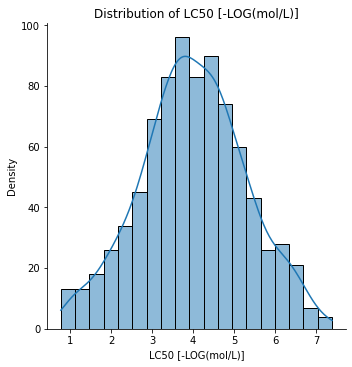

In [13]:
# Plot the distribution using Seaborn's displot
sns.displot(df_noMV['LC50 [-LOG(mol/L)]'], kde=True)

# Add title and labels
plt.title('Distribution of LC50 [-LOG(mol/L)]')
plt.xlabel('LC50 [-LOG(mol/L)]')
plt.ylabel('Density')

# Show the plot
plt.show()

The distribution plot of LC50 [-LOG(mol/L)] shows:
    
->Normal Distribution: The histogram and KDE line form a bell-shaped curve, indicating a normal distribution.
    
->Central Tendency: The peak is around 4 on the x-axis, suggesting this is the most common LC50 value.
    
->Spread: Values range from approximately 1 to 7.
    
->Density: The highest density is just above 100.
    
->Symmetry: The distribution is fairly symmetric around the central value.
    
These observations indicate that the LC50 [-LOG(mol/L)] values follow a distribution that is approximately normal, with most values clustering around the mean of 4, and a relatively symmetrical spread on either side.

# Splitting of the dataset as per 80% training and 20% testing.

In [14]:
df_new = df_noMV

X = df_new .drop('LC50 [-LOG(mol/L)]',axis =1)
y = df_new['LC50 [-LOG(mol/L)]']

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=100)

# Regression Model

1.Ridge Regression

In [15]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the lambda range
lamda = np.linspace(0, 1, 20)

# Initialize best parameters
best_lamda = 0
best_mae = float('inf')  # Initialize to a high value
best_mse = float('inf')  # Initialize to a high value
best_r2 = float('-inf')  # Initialize to a low value
best_adjr2 = float('-inf')  # Initialize to a low value

# Train and evaluate the Ridge regression model for each lambda
for param in lamda:
    RRM = Ridge(alpha=param)
    RRM.fit(X_train, y_train)

    y_pred = RRM.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    adjusted_r2 = 1 - (1-r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
    
    print(f"lambda = {param}")
    print(f"MAE for this lambda = {mae}")
    print(f"MSE for this lambda = {mse}")
    print(f"R² for this lambda = {r2}")
    print(f"Adjusted R² for this lambda = {adjusted_r2}")
    print("------------------")

    if mae < best_mae:
        best_mae = mae
        best_lamda = param

    if mse < best_mse:
        best_mse = mse
        best_lamda = param

    if r2 > best_r2:
        best_r2 = r2
        best_lamda = param

    if adjusted_r2 > best_adjr2:
        best_adjr2 = adjusted_r2
        best_lamda = param

print(f"Best value of lambda = {best_lamda}")
print(f"Best value of MAE for the best lambda = {best_mae}")
print(f"Best value of MSE for the best lambda = {best_mse}")
print(f"Best value of R² for the best lambda = {best_r2}")
print(f"Best value of Adjusted R² for the best lambda = {best_adjr2}")

lambda = 0.0
MAE for this lambda = 0.5551202150390567
MSE for this lambda = 0.5372741376554376
R² for this lambda = 0.6377977108564306
Adjusted R² for this lambda = 0.6242151250135467
------------------
lambda = 0.05263157894736842
MAE for this lambda = 0.5551867371689805
MSE for this lambda = 0.5373348082266768
R² for this lambda = 0.6377568099117427
Adjusted R² for this lambda = 0.624172690283433
------------------
lambda = 0.10526315789473684
MAE for this lambda = 0.5552531117994938
MSE for this lambda = 0.5373955941122807
R² for this lambda = 0.6377158312281056
Adjusted R² for this lambda = 0.6241301748991596
------------------
lambda = 0.15789473684210525
MAE for this lambda = 0.5553193393959279
MSE for this lambda = 0.537456494305436
R² for this lambda = 0.6376747754842607
Adjusted R² for this lambda = 0.6240875795649204
------------------
lambda = 0.21052631578947367
MAE for this lambda = 0.5553854204216432
MSE for this lambda = 0.5375175078063342
R² for this lambda = 0.63763364

# Observation:

# Best Lambda Value: 0.0

# ->The optimal value of lambda (regularization parameter) found through the Ridge regression is 0.0. This implies no regularization was applied, allowing the model to fit the data without penalty on coefficients.

# Best MAE: 0.5551

# ->The MAE for the best lambda is 0.5551. This value indicates the average absolute difference between the predicted and actual values. A lower MAE suggests better predictive accuracy, indicating that, on average, the model's predictions are close to the actual values.

# Best MSE: 0.5372

# ->Mean Squared Error (MSE): The MSE for the best lambda is 0.5372. MSE measures the average squared difference between predicted values and actual values. A lower MSE indicates better predictive accuracy, suggesting that the model's predictions are generally closer to the actual values.

# Best R²: 0.6377

# ->The R² score for the best lambda is 0.6377. R² measures the proportion of the variance in the dependent variable that is predictable from the independent variables. An R² of 0.6274 indicates that approximately 62.74% of the variability in the target variable is explained by the model. This indicates a strong fit of the model to the data.

# Best Adjusted R²: 0.6242

# ->The adjusted R² for the best lambda is 0.6242. Adjusted R² adjusts the R² value based on the number of predictors in the model, providing a more accurate measure of model performance. It accounts for the complexity added by additional predictors, showing a slightly more conservative estimate of the model's explanatory power.

# Final Verdict:

# ->Model Selection: The Ridge regression with a lambda of 0.0 was selected as the best model, indicating that no regularization was necessary to achieve optimal performance.

# ->Predictive Accuracy: The low MAE and MSE suggests that the model's predictions are generally close to the actual values, demonstrating good predictive accuracy.

# ->Explanatory Power: The high R² and adjusted R² values indicate that the model explains a significant proportion of the variance in the target variable, reflecting its strong fit to the data.

# 2. Multiple Regression

In [16]:
from sklearn.linear_model import LinearRegression

# model fitting
lm = LinearRegression()
lm.fit(X_train,y_train)

#predict the outcomes
y_pred = lm.predict(X_test)

coefficients = pd.DataFrame(lm.coef_,X.columns)
coefficients.columns = ['coefficients']
display(coefficients)

print("intercept is {}".format(lm.intercept_))

,coefficients
CIC0,0.303356
SM1_Dz(Z),1.130540
GATS1i,-0.550089
NdsCH,0.439784
NdssC,-0.003038
MLOGP,0.427427


intercept is 2.147564926802641


In [17]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
# Calculate R²
r2 = r2_score(y_test, y_pred)

# Calculate Adjusted R²
adjusted_r2 = 1 - (1-r2) * (len(y_test)-1) / (len(y_test)-X_test.shape[1]-1)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Print the model performance metrics
print(f"R²: {r2}")
print(f"Adjusted R²: {adjusted_r2}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")


R²: 0.6377977108564303
Adjusted R²: 0.6242151250135465
Mean Absolute Error (MAE): 0.5551202150390567
Mean Squared Error (MSE): 0.5372741376554379


# Observation:

# R² (Coefficient of Determination): 0.6377

# ->This indicates that approximately 62.74% of the variance in the dependent variable is explained by the independent variables in the model. This is a substantial proportion, showing a strong fit to the data.

# Adjusted R²: 0.6242

# ->This value is adjusted for the number of predictors in the model and is slightly lower than R², indicating that not all independent variables significantly contribute to the model. It provides a more conservative estimate of the model's explanatory power, accounting for the complexity of the model.

# Mean Absolute Error (MAE): 0.5551

# ->On average, the model's predictions are 0.5581 units away from the actual values, showing the average magnitude of errors in the predictions. A lower MAE indicates better predictive accuracy, suggesting that the model's predictions are generally close to the actual values.

# Mean Squared Error (MSE): 0.5372

# ->The Mean Squared Error (MSE) for the model is 0.5532. MSE quantifies the average squared difference between predicted values and actual values. A lower MSE indicates that, on average, the model's predictions are closer to the actual values, demonstrating effective predictive accuracy in minimizing errors.

# These metrics suggest that the model explains a substantial proportion of the variance (R² and Adjusted R²) and has a relatively low average error (MAE) and squared error (MSE), indicating strong predictive accuracy. While the fit is good, there may still be room for improvement in prediction accuracy and further reduction in errors.

In [18]:
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Assuming your data is in X (features) and y (target)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Define the Models and Hyperparameter Space# 

In [19]:
models = {
    'LinearRegression': LinearRegression(),
    'RandomForestRegressor': RandomForestRegressor(),
    'SVR': SVR()
}

param_grid = {
    'LinearRegression': {
        'fit_intercept': [True, False]
    },
    'RandomForestRegressor': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'SVR': {
        'kernel': ['linear', 'poly', 'rbf'],
        'C': [0.1, 1, 10, 100],
        'gamma': ['scale', 'auto']
    }
}


# Implement Grid Search with Cross-Validation

In [20]:
best_models = {}
for model_name in models:
    print(f"Optimizing {model_name}...")
    grid_search = GridSearchCV(estimator=models[model_name], param_grid=param_grid[model_name], 
                               cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_models[model_name] = grid_search.best_estimator_

    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best cross-validation MSE for {model_name}: {-grid_search.best_score_}")



Optimizing LinearRegression...
Best parameters for LinearRegression: {'fit_intercept': True}
Best cross-validation MSE for LinearRegression: 0.7394777628224084
Optimizing RandomForestRegressor...
Best parameters for RandomForestRegressor: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Best cross-validation MSE for RandomForestRegressor: 0.6194515869858741
Optimizing SVR...
Best parameters for SVR: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
Best cross-validation MSE for SVR: 0.628740609613565


# Evaluate the Best Model on Test Data

In [21]:
model_performance = {}
for model_name, model in best_models.items():
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    rmse = np.sqrt(mse)
    
    model_performance[model_name] = {
        'MSE': mse,
        'MAE': mae,
        'R²': r2,
        'RMSE': rmse
    }

    print(f"{model_name} Performance on Test Data:")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"R-squared (R²): {r2}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print()


LinearRegression Performance on Test Data:
Mean Squared Error (MSE): 0.5506042833659728
Mean Absolute Error (MAE): 0.5669903836500387
R-squared (R²): 0.5993568592559462
Root Mean Squared Error (RMSE): 0.7420271446288018

RandomForestRegressor Performance on Test Data:
Mean Squared Error (MSE): 0.4928768160016702
Mean Absolute Error (MAE): 0.5215462459215734
R-squared (R²): 0.6413618245835794
Root Mean Squared Error (RMSE): 0.7020518613333848

SVR Performance on Test Data:
Mean Squared Error (MSE): 0.42167506605564525
Mean Absolute Error (MAE): 0.49465634531246183
R-squared (R²): 0.6931712521282747
Root Mean Squared Error (RMSE): 0.6493651253768139



# Compare Models 

In [22]:
performance_df = pd.DataFrame(model_performance).T
print(performance_df)

# Identify the best model based on different metrics
best_model_mse = performance_df['MSE'].idxmin()
best_model_mae = performance_df['MAE'].idxmin()
best_model_r2 = performance_df['R²'].idxmax()
best_model_rmse = performance_df['RMSE'].idxmin()

print(f"Best model based on MSE: {best_model_mse}")
print(f"Best model based on MAE: {best_model_mae}")
print(f"Best model based on R²: {best_model_r2}")
print(f"Best model based on RMSE: {best_model_rmse}")

                            MSE       MAE        R²      RMSE
LinearRegression       0.550604  0.566990  0.599357  0.742027
RandomForestRegressor  0.492877  0.521546  0.641362  0.702052
SVR                    0.421675  0.494656  0.693171  0.649365
Best model based on MSE: SVR
Best model based on MAE: SVR
Best model based on R²: SVR
Best model based on RMSE: SVR


# INSIGHTS

Best Overall Model:

If one model consistently outperforms others across most or all metrics, it can be considered the best overall model. For example, if RandomForestRegressor has the lowest MSE, MAE, and RMSE and the highest R², it is likely the best model.
Trade-offs Between Models:

Sometimes, a model may have the lowest MAE but not the lowest MSE. This suggests that while it performs well on average, it might have some large errors affecting its MSE. Choosing between such models depends on the specific requirements of the application.
Model Robustness:

High variance in the R² values across different models indicates how much of the variability each model explains. A model with a significantly higher R² is likely more robust.
Complexity vs. Performance:

More complex models like RandomForestRegressor or SVR might perform better than simpler models like LinearRegression but at the cost of increased computational resources and longer training times.